1
0.028846153846153848
0.9999999999999999


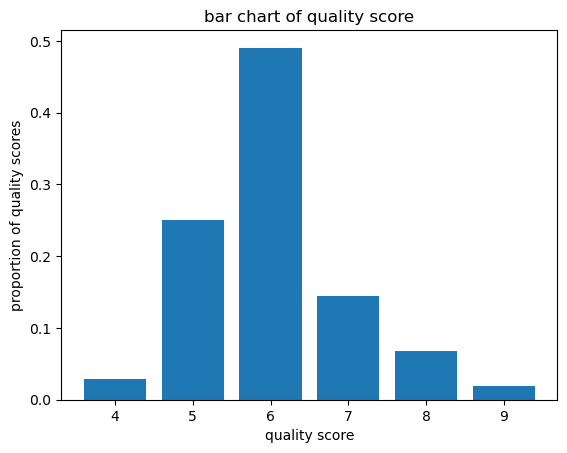

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality Score
0,6.900000,0.270000,0.340000,3.050000,0.050000,32.000000,137.000000,0.994000,3.210000,0.460000,9.950000,6.000000
1,6.947115,0.296058,0.340385,5.536538,0.051346,35.625000,139.461538,0.994260,3.212115,0.462788,10.236538,6.028846
2,0.456691,0.012861,0.016074,26.978021,0.000573,227.712379,1756.736370,0.000008,0.017411,0.008723,1.471468,0.960325
3,3.900000,0.590000,0.630000,19.900000,0.160000,77.000000,188.000000,0.012000,0.750000,0.490000,4.200000,5.000000


,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Free Sulfur Dioxide,Total Sulfur Dioxide,pH,Sulphates,Alcohol,Quality Score
0,6.900000,0.260000,0.340000,3.050000,32.000000,137.000000,3.210000,0.460000,9.950000,6.000000
1,6.926214,0.280900,0.340385,5.536538,35.184466,139.461538,3.207476,0.459806,10.236538,5.970588
2,0.415287,0.007329,0.016074,26.978021,209.563678,1756.736370,0.015321,0.007874,1.471468,0.801107
3,3.400000,0.420000,0.630000,19.900000,65.000000,188.000000,0.600000,0.430000,4.200000,4.000000


P(A1) = 0.5096153846153846
P(A2) = 0.5096153846153846
P(A3) = 0.49038461538461536
P(B1) = 0.9134615384615384
P(B2) = 0.7211538461538461
P(A1 intersect B1) = 0.4423076923076923
P(A1 intersect B2) = 0.4230769230769231
P(A2 intersect B1) = 0.4423076923076923
P(A2 intersect B2) = 0.41346153846153844
P(A3 intersect B1) = 0.41346153846153844
P(A3 intersect B2) = 0.375
P(A1 given B1) = 0.4842105263157895
P(A1 given B2) = 0.5866666666666667
P(A2 given B1) = 0.4842105263157895
P(A2 given B2) = 0.5733333333333333
P(A3 given B1) = 0.4526315789473684
P(A3 given B2) = 0.52
d1 = 0.09694012358832303
d2 = 0.12613333333333332


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
file = "WineCharacteristics2.csv"
df = pd.read_csv(file)
clean_df = df.dropna(how = "any")

num = len(clean_df[clean_df["Free Sulfur Dioxide"] >= clean_df["Total Sulfur Dioxide"]])
print(num)
clean_df = clean_df[clean_df["Free Sulfur Dioxide"] < clean_df["Total Sulfur Dioxide"]]
clean_df
proportion4 = len(clean_df[(clean_df["Quality Score"] == 4)])/len(clean_df["Quality Score"])
proportion5 = len(clean_df[(clean_df["Quality Score"] == 5)])/len(clean_df["Quality Score"])
proportion6 = len(clean_df[(clean_df["Quality Score"] == 6)])/len(clean_df["Quality Score"])
proportion7 = len(clean_df[(clean_df["Quality Score"] == 7)])/len(clean_df["Quality Score"])
proportion8 = len(clean_df[(clean_df["Quality Score"] == 8)])/len(clean_df["Quality Score"])
proportion9 = len(clean_df[(clean_df["Quality Score"] == 9)])/len(clean_df["Quality Score"])
print(proportion4)
pro = np.array([proportion4,proportion5,proportion6,proportion7,proportion8,proportion9])
x_axis = np.array(['4','5','6','7','8','9'])
y_axis = pro
plt.bar(x_axis,y_axis)
summ = sum(pro)
plt.title('bar chart of quality score')
plt.xlabel('quality score')
plt.ylabel('proportion of quality scores')
print(summ)
plt.show()
tolist = []
#convert series to list
for column in clean_df.columns:
    temp = clean_df[column].tolist()
    tolist.append(temp)
#sort the list for each category
for i in range(12):
    tolist[i].sort()
#function for median
def find_median(input,length):
    output = 0
    if (length % 2 == 0):
         output = (input[int(length/2-1)]+input[int(length/2)])/2
    else:
        output = input[int(length/2)+1]
    return output
#function for finding the range
def find_range(input,length):
    output = input[length-1]-input[0]
    return output
#function for finding the mean
def find_mean(input,length):
    
    sum = 0
    for i in range(length):
        sum+=input[i]
    return sum/length
#function for finding the variance
def find_variance(input,length):
    #find mean
    sum = 0
    for i in range(length):
        sum+=input[i]
    mean = sum/length
    total = 0
    for j in range(length):
        total += (input[j]-mean)**2
    return total/(length-1)
headers = list(clean_df.columns.values)
mean_list = []
variance_list = []
median_list = []
range_list = []
#convert sample stats into a list
for i in range(int(len(headers))):
    mean_list.append(find_mean(tolist[i],len(tolist[i])))
    median_list.append(find_median(tolist[i],len(tolist[i])))
    variance_list.append(find_variance(tolist[i],len(tolist[i])))
    range_list.append(find_range(tolist[i],len(tolist[i])))
stat_list = []
stat_list.append(median_list)
stat_list.append(mean_list)
stat_list.append(variance_list)
stat_list.append(range_list)
#convert list into a dataframe
stat_df = pd.DataFrame(stat_list, columns=headers)
display(stat_df)
def cal_zscore(value,mean,std):
    zscore = 0
    zscore = (value-mean)/std
    return zscore
outlier_value = []
def find_zscore(datalist):
    outlier_position = []
    for i in range(len(datalist)):
        #if (i == 4 or i == 7):
            #continue
        position = []
        
        mean = find_mean(tolist[i],len(tolist[i])) 
        std = find_variance(tolist[i],len(tolist[i]))**(1/2)
        for j in range (len(datalist[0])):
            if (abs(cal_zscore(datalist[i][j],mean,std) > 3)):
                position.append([i,j])
                outlier_value.append(datalist[i][j])
        outlier_position.append(position)
        
    return outlier_position
outlier = find_zscore(tolist)
original = tolist

for i in range(len(outlier)):
    
    
    if (i == 4 or i == 7):
        continue
    if (len(outlier[i]) > 0):
        
        for j in range(len(outlier[i])):
            
            
            tolist[outlier[i][j][0]][outlier[i][j][1]] = 0
new_mean_list = []
new_variance_list = []
new_median_list = []
new_range_list = []
#convert sample stats into a list
for i in range(int(len(headers))):
        if (i == 4 or i == 7):
            continue
        else:
            new_mean_list.append(find_mean(tolist[i],len(tolist[i])-len(outlier[i])))
            new_median_list.append(find_median(tolist[i],len(tolist[i])-len(outlier[i])))
            new_variance_list.append(find_variance(tolist[i],len(tolist[i])-len(outlier[i])))
            new_range_list.append(find_range(tolist[i],len(tolist[i])-len(outlier[i])))
new_stat_list = []
new_stat_list.append(new_median_list)
new_stat_list.append(new_mean_list)
new_stat_list.append(new_variance_list)
new_stat_list.append(new_range_list)
new_headers = headers
new_headers.remove("Chlorides")
new_headers.remove("Density")
new_stat_df = pd.DataFrame(new_stat_list, columns=headers)
display(new_stat_df)

A1 = clean_df["Residual Sugar"] < 4.0
A21 = clean_df['Free Sulfur Dioxide'] >= 25
A22 = clean_df['Free Sulfur Dioxide'] <= 45
A31 = clean_df['pH'] >= 3.2
A32 = clean_df['pH'] <= 3.4
B1 = clean_df["Quality Score"]<=7
B2 = clean_df["Quality Score"]>= 6
PA1 = len(clean_df[A1]) / len(clean_df["Residual Sugar"])
print("P(A1) = "+str(PA1))
PA2 = len(clean_df[(A21) & (A22)])/len(clean_df["Free Sulfur Dioxide"])
print("P(A2) = "+str(PA2))
PA3 = len(clean_df[(A31) & (A32)])/ len(clean_df["pH"])
print("P(A3) = "+str(PA3))
PB1 = len(clean_df[B1]) / len(clean_df["Quality Score"])
print("P(B1) = "+str(PB1))
PB2 = len(clean_df[B2]) / len(clean_df["Quality Score"])
print("P(B2) = "+str(PB2))
PA1B1 = len(clean_df[(A1) & (B1)])/len(clean_df["Quality Score"])
print("P(A1 intersect B1) = " + str(PA1B1))
PA1B2 = len(clean_df[(A1) & (B2)])/len(clean_df["Quality Score"])
print("P(A1 intersect B2) = " + str(PA1B2))
PA2B1 = len(clean_df[(A21) & (B1) & (A22)])/len(clean_df["Quality Score"])
print("P(A2 intersect B1) = " + str(PA2B1))
PA2B2 = len(clean_df[(A21) & (B2) & (A22)])/len(clean_df["Quality Score"])
print("P(A2 intersect B2) = " + str(PA2B2))
PA3B1 = len(clean_df[(A31) & (B1) & (A32)])/len(clean_df["Quality Score"])
print("P(A3 intersect B1) = " + str(PA3B1))
PA3B2 = len(clean_df[(A31) & (B2) & (A32)])/len(clean_df["Quality Score"])
print("P(A3 intersect B2) = " + str(PA3B2))
PA1gB1 = PA1B1/PB1
print("P(A1 given B1) = " + str(PA1gB1))
PA1gB2 = PA1B2/PB2
print("P(A1 given B2) = " + str(PA1gB2))
PA2gB1 = PA2B1/PB1
print("P(A2 given B1) = " + str(PA2gB1))
PA2gB2 = PA2B2/PB2
print("P(A2 given B2) = " + str(PA2gB2))
PA3gB1 = PA3B1/PB1
print("P(A3 given B1) = " + str(PA3gB1))
PA3gB2 = PA3B2/PB2
print("P(A3 given B2) = " + str(PA3gB2))
d1 = PB1 * PA1gB1 * PA2gB1 * PA3gB1
d2 = PB2 * PA1gB2 * PA2gB2 * PA3gB2
print("d1 = "+str(d1))
print("d2 = "+str(d2))